# RNN and LSTM with TF2.0

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

## MNIST 불러오기 

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

In [3]:
print(sample.shape)

(28, 28)


## 발전된 모델로 MNIST 분류기 만들기 

In [4]:
# hyperparameter 세팅
input_dim = 28
output_size = 10
units = 64
batch_size = 64
epochs=10

In [5]:
# model 정의
model = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units, input_shape=(None, input_dim)),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(output_size, activation='softmax')])
    
# multiclass-classification을 할 때 loss
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
# 모델 실행.
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=batch_size, 
                    epochs=epochs)

Epoch 1/10
938/938 [==============================] - 9s 10ms/step - loss: 0.9378 - accuracy: 0.7019 - val_loss: 0.7302 - val_accuracy: 0.7629
Epoch 2/10
938/938 [==============================] - 9s 9ms/step - loss: 0.3871 - accuracy: 0.8840 - val_loss: 0.3866 - val_accuracy: 0.8738
Epoch 3/10
938/938 [==============================] - 9s 9ms/step - loss: 0.2512 - accuracy: 0.9240 - val_loss: 0.2035 - val_accuracy: 0.9369
Epoch 4/10
938/938 [==============================] - 9s 9ms/step - loss: 0.1975 - accuracy: 0.9410 - val_loss: 0.1697 - val_accuracy: 0.9468
Epoch 5/10
938/938 [==============================] - 9s 9ms/step - loss: 0.1673 - accuracy: 0.9497 - val_loss: 0.3023 - val_accuracy: 0.8997
Epoch 6/10
938/938 [==============================] - 9s 9ms/step - loss: 0.1476 - accuracy: 0.9549 - val_loss: 0.1545 - val_accuracy: 0.9520
Epoch 7/10
938/938 [==============================] - 9s 9ms/step - loss: 0.1323 - accuracy: 0.9601 - val_loss: 0.1185 - val_accuracy: 0.9612
Epoch

In [7]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("Test Score: ", score)
print("Test Accuracy: ", acc)

157/157 [==============================] - 1s 3ms/step - loss: 0.1034 - accuracy: 0.9680
Test Score:  0.10343996435403824
Test Accuracy:  0.9679999947547913


## loss value 시각화 

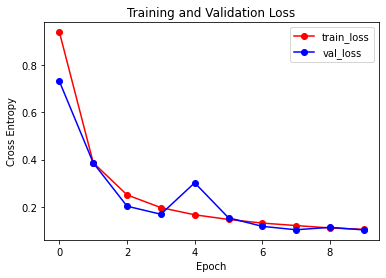

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label="train_loss")
plt.plot(val_loss, 'bo-', label="val_loss")
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend(loc="best")
plt.title('Training and Validation Loss')
plt.show()